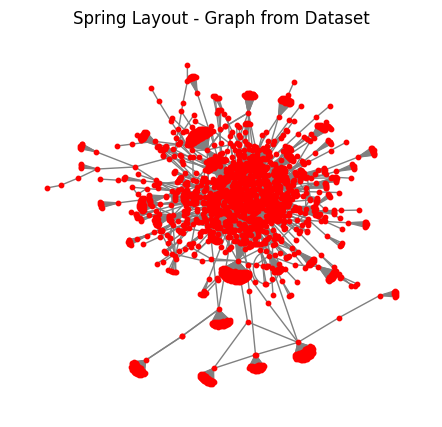

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
from io import StringIO

def read_txt_from_github(github_url):
    try:
        response = requests.get(github_url)
        response.raise_for_status()  # Raise an exception for unsuccessful HTTP requests

        # Read the content of the text file
        text_content = response.text

        return text_content

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return None

def create_graph_from_txt(txt_content):
    G = nx.Graph()

    # Parse the text content and add edges to the graph
    for line in StringIO(txt_content):
        edge_data = line.strip().split(',')
        if len(edge_data) == 2:
            source, target = edge_data
            G.add_edge(source, target)

    return G

# Read the text content from the GitHub link
github_url = "https://raw.githubusercontent.com/aisprilet/Visual-Dataset/main/rt_assad.txt"
text_content = read_txt_from_github(github_url)

# Create two different types of graphs
graph1 = create_graph_from_txt(text_content)


# Plot the graphs using spring layout
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos1 = nx.spring_layout(graph1)
#nx.draw(graph1, pos=pos1, with_labels=False, font_weight='bold')
nx.draw(graph1, with_labels=False, node_size=10, node_color='red', font_size=10, font_color='black', font_weight='bold', edge_color='gray')
plt.title('Spring Layout - Graph from Dataset')

plt.show()


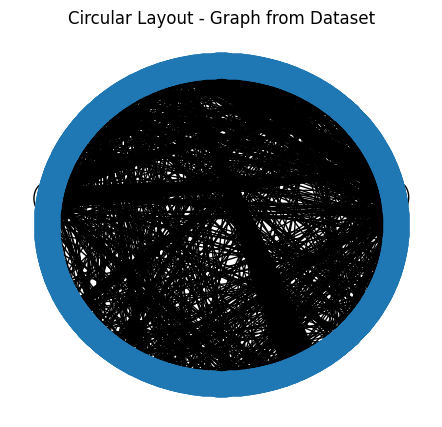

In [12]:

# Plot the graphs using circular layout
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
pos3 = nx.circular_layout(graph1)
nx.draw(graph1, pos=pos3, with_labels=False, font_weight='bold')

plt.title('Circular Layout - Graph from Dataset')

plt.show()
